## Exploratory Data Analysis I


Exploratory Data Analysis (EDA) je proces analize podataka kojem je cilj razumjeti osnovne karakteristike skupa podataka i otkriti uzorke, odnose ili nepravilnosti koje mogu biti korisne za dalju analizu. EDA se obično primenjuje na sirove podatke pre nego što se primene složenije statističke metode ili algoritmi za modeliranje. Glavni ciljevi EDA-a uključuju:

Identifikacija i razumjevanje strukture podataka: EDA pomaže u prepoznavanju osnovnih karakteristika skupa podataka, kao što su distribucije, srednje vrednosti, varijacije i slično.

Detekcija nepravilnosti i outlier-a: EDA pomaže identifikaciji neobičnih vrednosti u podacima, poznatih kao outlier-i, koji mogu ukazivati na greške u prikupljanju podataka ili značajne informacije.

Proučavanje uzoraka i odnosa: Analizom grafikona, tabela i drugih vizualizacija, EDA pomaže u identifikaciji uzoraka i odnosa između različitih promenljivih u skupu podataka.

Priprema podataka za dalju analizu: EDA može uključivati i čišćenje podataka, popunjavanje nedostajućih vrednosti ili transformaciju podataka kako bi se poboljšala njihova upotrebljivost za analizu.

Postavljanje hipoteza: Na osnovu inicijalne analize podataka, istraživači mogu postaviti hipoteze koje će kasnije testirati pomoću statističkih metoda.

EDA obično uključuje upotrebu statističkih grafikona, histograma, dijagrama raspršenosti, box-plot dijagrama, kao i opsežno korišćenje deskriptivne statistike. Ovo je važan korak u procesu analize podataka jer pomaže u razumevanju osnovnih karakteristika podataka pre nego što se primene složenije analize ili modeliranje podataka.

Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

In [2]:
df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


LEGENDA

**survival** - Survival (0 = No; 1 = Yes) - PREŽIVJELI  
**class** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
**name** - Name  
**sex** - Sex - SPOL  
**age** - Age  
**sibsp** - Number of Siblings/Spouses Aboard - BROJ BRAĆE I SESTARA/ SUPRUŽNIKA  
**parch** - Number of Parents/Children Aboard - BROJ RODITELJA/ DJECE NA BRODU  
**ticket** - Ticket Number  
**fare** - Passenger Fare  
**cabin** - Cabin  
**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) - UKRCAVANJE  



In [3]:
df.set_index('PassengerId', inplace=True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.62
1    0.38
Name: proportion, dtype: float64

Missing values

In [9]:
total = df.isnull().sum().sort_values(ascending=False)

procenat = df.isnull().sum()/df.isnull().count()*100

missing_data = pd.concat([total, procenat], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


Pronalazak kapetana

In [10]:
df[df["Name"].str.contains("Capt")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


Survived vs not-survived

<Axes: xlabel='Sex', ylabel='count'>

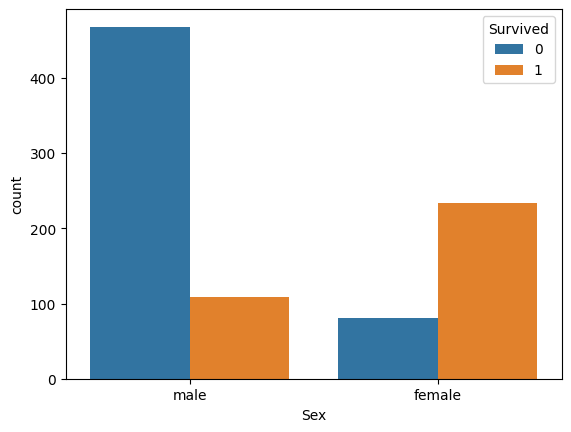

In [11]:
sns.countplot(x='Sex', data=df, hue='Survived')

In [12]:
df.groupby(['Sex', 'Pclass']).describe()

Survived                                         Age         \
                 count  mean   std  min  25%  50%  75%  max  count   mean   
Sex    Pclass                                                               
female 1          94.0  0.97  0.18  0.0  1.0  1.0  1.0  1.0   85.0  34.61   
       2          76.0  0.92  0.27  0.0  1.0  1.0  1.0  1.0   74.0  28.72   
       3         144.0  0.50  0.50  0.0  0.0  0.5  1.0  1.0  102.0  21.75   
male   1         122.0  0.37  0.48  0.0  0.0  0.0  1.0  1.0  101.0  41.28   
       2         108.0  0.16  0.37  0.0  0.0  0.0  0.0  1.0   99.0  30.74   
       3         347.0  0.14  0.34  0.0  0.0  0.0  0.0  1.0  253.0  26.51   

               ... Parch        Fare                                      \
               ...   75%  max  count    mean    std    min    25%    50%   
Sex    Pclass  ...                                                         
female 1       ...   1.0  2.0   94.0  106.13  74.26  25.93  57.24  82.66   
       2       ...   1.0  3.0   76.0   21.97  10.89  10.50  13.00  22.00   
       3       ...   1.0  6.0  144.0   16.12  11.69   6.75   7.85  12.47   
male   1       ...   0.0  4.0  122.0   67.23  77.55   0.00  27.73  41.26   
       2       ...   0.0  2.0  108.0   19.74  14.92   0.00  12.33  13.00   
       3       ...   0.0  5.0  347.0   12.66  11.68   0.00   7.75   7.92   

                               
                  75%     max  
Sex    Pclass                  
female 1       134.50  512.33  
       2        26.06   65.00  
       3        20.22   69.55  
male   1        78.46  512.33  
       2        26.00   73.50  
       3        10.01   69.55  

[6 rows x 40 columns]

Age and Sex distributions

<Axes: xlabel='Age', ylabel='Count'>

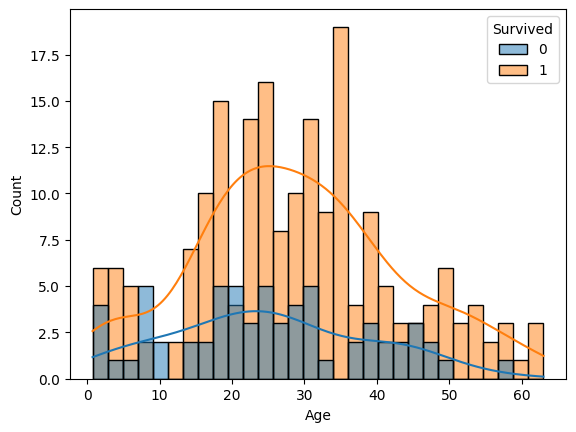

In [13]:
sns.histplot(data=df[df['Sex']=="female"], x='Age',hue='Survived', bins=30, kde=True)


<Axes: xlabel='Age', ylabel='Count'>

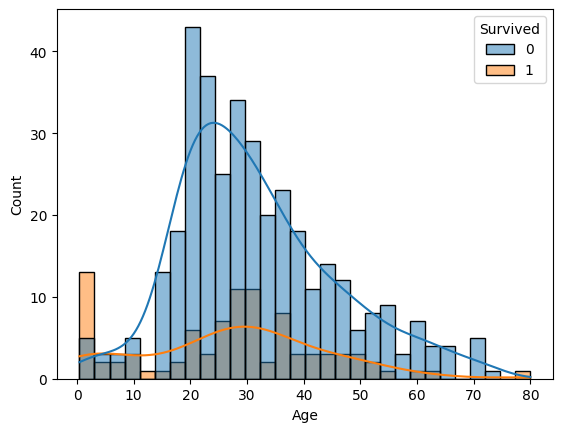

In [14]:
sns.histplot(data=df[df['Sex']=="male"], x='Age',hue='Survived', bins=30, kde=True)

Saving children first

In [15]:
df[df['Age']<18].groupby(['Sex','Pclass']).describe()

Survived                                        Age         ...  \
                 count  mean   std  min  25%  50%  75%  max count   mean  ...   
Sex    Pclass                                                             ...   
female 1           8.0  0.88  0.35  0.0  1.0  1.0  1.0  1.0   8.0  14.12  ...   
       2          12.0  1.00  0.00  1.0  1.0  1.0  1.0  1.0  12.0   8.33  ...   
       3          35.0  0.54  0.51  0.0  0.0  1.0  1.0  1.0  35.0   8.43  ...   
male   1           4.0  1.00  0.00  1.0  1.0  1.0  1.0  1.0   4.0   8.23  ...   
       2          11.0  0.82  0.40  0.0  1.0  1.0  1.0  1.0  11.0   4.76  ...   
       3          43.0  0.23  0.43  0.0  0.0  0.0  0.0  1.0  43.0   9.96  ...   

              Parch       Fare                                                \
                75%  max count    mean    std    min     25%     50%     75%   
Sex    Pclass                                                                  
female 1       1.25  2.0   8.0  104.08  57.16  39.40   57.73   97.70  127.89   
       2       2.00  2.0  12.0   26.24   9.38  10.50   22.12   26.25   30.80   
       3       2.00  2.0  35.0   18.73   9.81   7.22   11.19   15.74   26.02   
male   1       2.00  2.0   4.0  116.07  28.70  81.86  103.63  115.44  127.89   
       2       1.00  2.0  11.0   25.66   9.44  10.50   18.75   26.00   32.88   
       3       2.00  3.0  43.0   22.75  13.50   7.05    8.94   20.52   31.39   

                       
                  max  
Sex    Pclass          
female 1       211.34  
       2        41.58  
       3        46.90  
male   1       151.55  
       2        39.00  
       3        46.90  

[6 rows x 40 columns]

Passenger class distribution; Survived vs Non-Survived

<Axes: xlabel='Pclass', ylabel='count'>

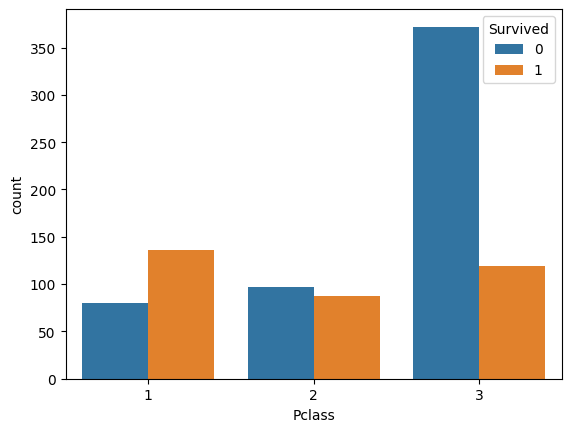

In [16]:
sns.countplot(x='Pclass', data=df, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

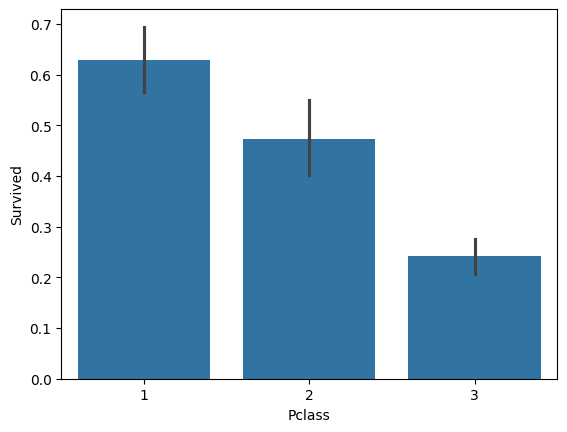

In [17]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Correlation Matrix and Heatmap

In [19]:
df_corr = df[['Age','SibSp','Parch','Fare']]

In [20]:
corr_M = df_corr.corr()

<Axes: >

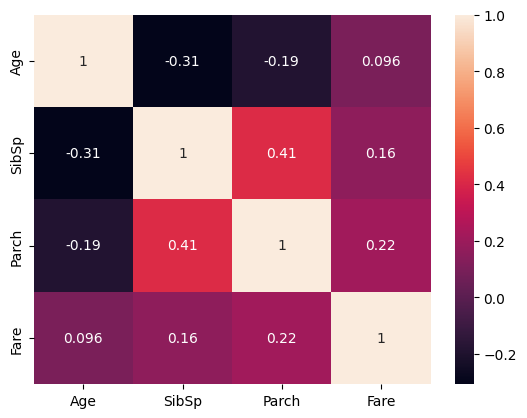

In [21]:
sns.heatmap(corr_M, annot=True)